In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import datetime

import sys
sys.path.append("../src")

from stochastic_glv_generator import *
from experiments import *
from analysis import *

## Dataset properties

n_sp = np.array([2, 4, 6, 8, 10])
n_samples = [5, 10, 20, 50, 100]
t_samp_list = [np.linspace(0, 30, i) for i in n_samples]

params_seeds = np.arange(20)

env_noise_list = [0., 0.05, 0.1, 0.2]
meas_noise_list = [0.1, 0.05, 0.1, 0.2]

n_init_cond = 20

perturb_exp_base = 2.
perturb_scale_and_sigma = [0, 1.5]

repetitions = 1

t0 = 0.
dt = 1e-3

r_max = 1.
A_off_diag_std = 1.
A_diag_mean = A_off_diag_std * n_sp**0.5 * 1.1
A_diag_std = 0.1 * A_diag_mean

In [43]:
n_sp = np.array([3, 5, 7, 10, 20])
n_samples = [11]#, 21, 31, 51, 76, 101, 201]
t_samp_list = [np.linspace(0, 30, i) for i in n_samples]

params_seeds = np.arange(10)

env_noise_list = [0.1]
meas_noise_list = [0.1]

n_init_cond = 100

growth_scale = [0.1]

# if len(sys.argv) > 1:
#     growth_scale[0] = np.float64(sys.argv[1])

save_loc = "test_growth"
# if len(sys.argv) > 2:
#     save_loc = sys.argv[2]
# print(f"Save location = {save_loc}\n")

repetitions = 1

t0 = 0.
dt = 1e-3

r_max = 1.
A_off_diag_std = 1.
A_diag_mean = A_off_diag_std * n_sp**0.5 * 1.1
A_diag_std = 0.1 * A_diag_mean

In [44]:
n_experiments = len(n_sp) * len(params_seeds) * len(env_noise_list)
print(f"Number of experiments (= number of files): {n_experiments}")

n_datasets = n_init_cond * repetitions * len(meas_noise_list) * len(n_samples)
print(f"Number of datasets per file: {n_datasets}")

print(f"Total number of datasets: {n_experiments*n_datasets}")

data_size = (n_sp.sum()+5*len(n_sp)) * np.sum(n_samples) *  len(params_seeds) * len(env_noise_list) *\
     len(meas_noise_list) * n_init_cond * repetitions * 18 / 1024**2
print(f"Expected total size: {data_size:.3f} MB")

Number of experiments (= number of files): 50
Number of datasets per file: 100
Total number of datasets: 5000
Expected total size: 13.218 MB


## Dataset generation command

np.random.seed(0)

for i in range(len(n_sp)):
    print(f"{n_sp[i]} species: ")
    for j in tqdm(range(len(params_seeds))):
        p = sort_glv_params(n_sp[i], params_seeds[j], r_max, A_diag_mean[i], A_diag_std[i], A_off_diag_std)

        r = p[:n_sp[i]]
        A = p[n_sp[i]:].reshape((n_sp[i], n_sp[i]))
        x_eq = -np.linalg.inv(A)@r

        init_cond_list = init_cond_by_perturb(x_eq, perturb_exp_base, perturb_scale_and_sigma, n_init_cond)

        for k in range(len(env_noise_list)):
            env_noise = env_noise_list[k]
            save_name = f"{n_sp[i]}_sp{j}_env_noise{env_noise}"
            gen_replicates(p, env_noise, init_cond_list, t0, dt, t_samp_list, meas_noise_list, repetitions, 
            seed=k, scale_meas_noise_by_abund=True, save_datasets=True, save_loc="perturb_meas_0.1", save_name=save_name)

In [45]:
np.random.seed(0)

for i in range(len(n_sp)):
    print(f"{n_sp[i]} species: ")
    for j in tqdm(range(len(params_seeds))):
        p = sort_glv_params(n_sp[i], params_seeds[j], r_max, A_diag_mean[i], A_diag_std[i], A_off_diag_std)

        r = p[:n_sp[i]]
        A = p[n_sp[i]:].reshape((n_sp[i], n_sp[i]))
        x_eq = -np.linalg.inv(A)@r

        init_cond_list = init_cond_by_growth(x_eq, growth_scale, n_init_cond)

        for k in range(len(env_noise_list)):
            env_noise = env_noise_list[k]
            save_name = f"{n_sp[i]}_sp{j}_env_noise{env_noise}"
            gen_replicates(p, env_noise, init_cond_list, t0, dt, t_samp_list, meas_noise_list, repetitions, 
            seed=k, scale_meas_noise_by_abund=True, save_datasets=True, save_loc=save_loc, save_name=save_name)

3 species: 


100%|██████████| 10/10 [00:17<00:00,  1.71s/it]


5 species: 


100%|██████████| 10/10 [00:27<00:00,  2.79s/it]


7 species: 


100%|██████████| 10/10 [00:54<00:00,  5.49s/it]


10 species: 


100%|██████████| 10/10 [01:17<00:00,  7.70s/it]


20 species: 


100%|██████████| 10/10 [01:46<00:00, 10.70s/it]


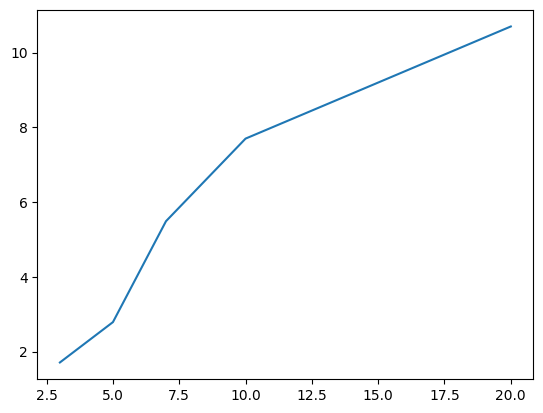

In [46]:
plt.plot([3, 5, 7, 10, 20], [1.71, 2.79, 5.49, 7.7, 10.7])